In [ ]:
library(tidyverse)

### 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [2]:
setwd("~/Documents/R main")
lexicaldata <- read.csv("LexicalData_toclean.csv")
head(lexicaldata)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


### 2. Data Cleansing (4 points)
There are three things we want to do to make this data more useable:

- Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
- Get rid of rows where the reaction times are missing (hint: you can use the filter function from `tidyverse`, but you'll need to load the library).
- Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [3]:
lexicaldata_clean <- lexicaldata
lexicaldata_clean$D_RT <- as.numeric(gsub("[,]", "",lexicaldata_clean$D_RT) )
lexicaldata_clean <- lexicaldata_clean %>% filter(!(D_RT == "") & D_RT > 0)
head(lexicaldata_clean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the type of anomaly it's addressing.

Write your response here.

> First action: **Synactical - domain format error** : removing comma
<br> Second action: **Coverage - missing value** : missing reaction times 
<br> Third action: **Semantic - integrity constraint violations** : reaction times cannot be negative

### 3. Data Manipulation with Tidyverse (4 points)
Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [4]:
group_by(lexicaldata_clean) %>% summarize (
    observations = n(),
    mean_RT = mean(D_RT),
    RT_sd = sd(D_RT),
)

observations,mean_RT,RT_sd
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [5]:
lexicaldata_clean <- lexicaldata_clean %>%
  mutate(New_Trial = Trial-1)
head(lexicaldata_clean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,New_Trial
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


### 4. Plotting Data (1 point)
Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

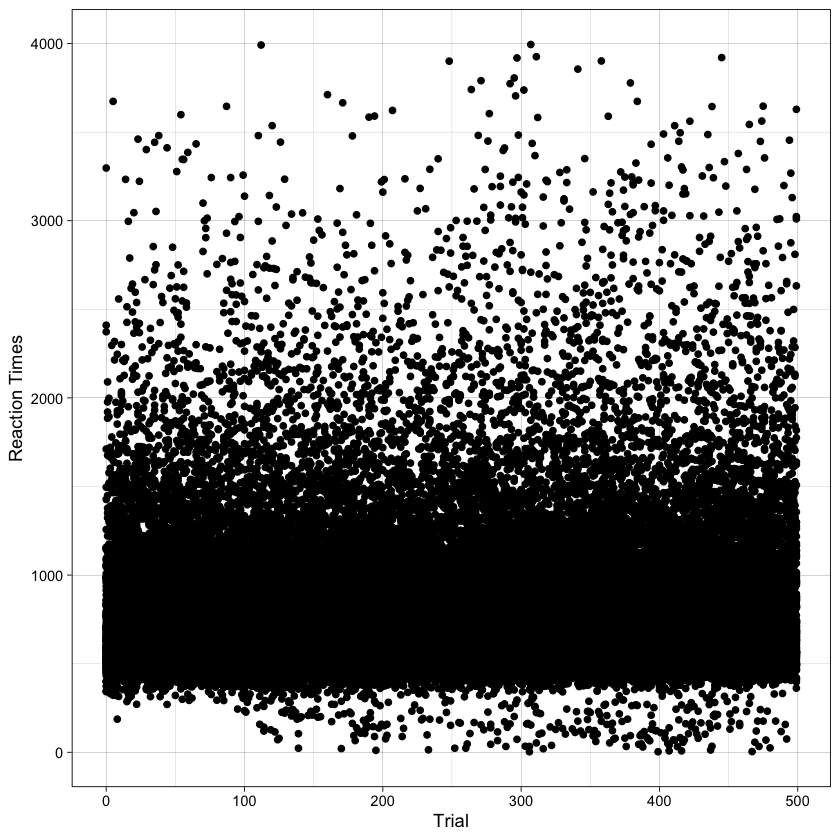

In [9]:
library(ggplot2)
plot <- ggplot(lexicaldata_clean, aes(x=New_Trial, y=D_RT)) + 
  geom_point() + 
  xlab("Trial") + ylab ("Reaction Times") +
  theme_linedraw()
plot

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.

>  Danielle Fox